In [1]:
%matplotlib inline

from matplotlib import pyplot as plt

import numpy as np

import time

# > DESCRIÇÃO DA TAREFA
## 1. Contar o número de operações do algoritmo de ordenação de inserção simples
## 2. Achar a complexidade em tempo desse algoritmo
## 3. Medir o tempo em função de n
## 4. Obter a curva de número de operações em função de n
## 5. Obter a constante de calibração
## 6. Comparar (plotar) a curva experimental com a curva teórica calibrada

# > FUNDAMENTOS TEÓRICOS:
## O algoritmo divide os dados em 2 listas, uma ordenada e a outra não. A lista ordenada começa com 1 elemento e cresce, enquanto a lista não ordenada decresce até esvaziar
## Em vez de construir duas listas, o algoritmo pode trabalhar na mesma lista usando um cursor.
## Em cada rodada o primeiro elemento da lista não ordenada é inserido na posição certa na lista ordenada, como mostrado na figura
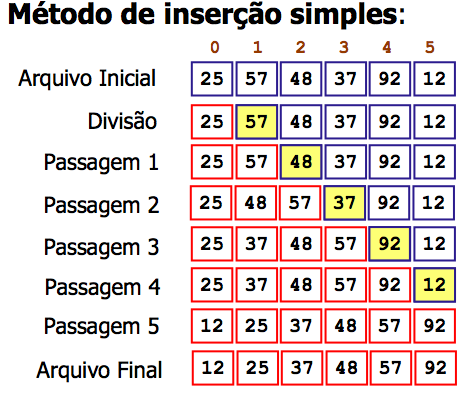

# > CONFIGURAÇÃO DO PROBLEMA

In [7]:
# ALGORITMO insertion sort

T=[]
n_val=[]

mn = 50
Mn = 300
stpn= 50

for n in range(mn,Mn,stpn):

    t=[]

    rep = int(n/2) # rep crescente - qto maior n, mais repetições são necessárias -> economiza tempo do teste

    # criando varias vers'oes aleatórias do vetor a ser ordenado
    
    for r in range(rep):
        # geração dos dados de teste
        a=np.random.uniform(1,int(5*n),n).astype('int') # minimo, maximo, num. classes < diferentes arquivos em cada ordenação
        tic=time.time()
        for i in range(1,n): # X=n-1 (a,o,c) = (1,0,0) + X(1,1,1)
            tmp=a[i] # (a,o,c) = (2,0,0)
            for j in range(i-1,-2,-1): # Yb = 1, Yw = i  b=best, w =worst (a,o,c) = (1,0,0)+Yw(1,1,1)
                if a[j]>tmp: # (a,o,c)=(1,0,1)
                    a[j+1]=a[j] # (a,o,c)=(3,1,0)
                else:
                    break
#             [a[j+1]=a[j] for j in range(i-1,-2,-1) if a[j]>tmp]
            a[j+1]=tmp # (a,o,c)=(2,1,0)
        #    print(a[:i+1])
        toc=time.time()
        t.append(toc-tic)

    T.append(np.mean(t))
    n_val.append(n)
    
# ESTIMATIVA ANALITICA DO NUMERO DE OPERAÇÕES (ESTRATIFICADO E TOTAL)

#(A,O,C)=(1,0,0) + sum_{i=1}^{n-1}{ (1,1,1) + (2,0,0) + (1,0,0) + (2,1,0) + i[(1,1,1)+(3,1,0)] }  

(A,O,C)=(1,0,0) + (6,2,1) (n-1) + (4,2,1) sum_{i=1}^{n-1}{i}

(A,O,C)=(1,0,0) + (6,2,1) (n-1) + (4,2,1) (n-1) (n)/2

(A,O,C)=(1,0,0) + (6,2,1)n-(6,2,1)+(4,2,1)(n^2)/2-(4,2,1)n/2

(A,O,C)=-(5,2,1) + (6,2,1)n +(2,1,1/2)n^2-(2,1,1/2)n

(A,O,C)=(2,1,1/2)n^2 + (4,1,1/2)n - (5,2,1) 

# A = 2n^2 + 4n - 5
# O = n^2 + n - 2
# C = 1/2n^2 + n/2 - 1

# COMPLEXIDADES: A: O(n^2), O: O(n^2), C: O(n^2) 

# total T = A + O + C = 7/2 n^2 + 11/2 n - 8


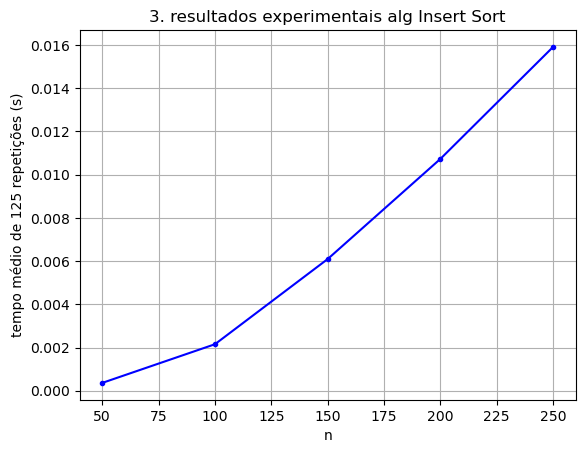

In [8]:
# plot
plt.plot(n_val,T,'b.-')
plt.title("3. resultados experimentais alg Insert Sort")
plt.xlabel('n')
plt.ylabel('tempo médio de '+str(rep)+' repetições (s)')
plt.grid()
plt.show()

5. número de operações por segundo: 13 MFLOPS


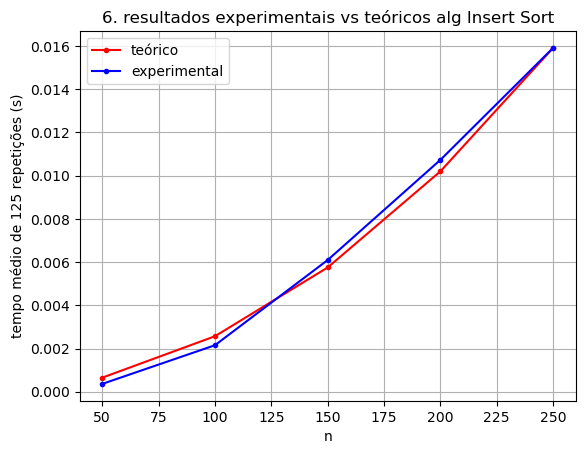

In [9]:
# Avaliação da predição teórica

n_value=[]
Th=[]
Tc=[]

for N in range(mn,Mn,stpn): # tarefa 4
    n_value.append(N)
    Th.append((7/2)*N*N + (11/2)*N - 8) # número de operações
    Tc.append(N*N)
    
# calibração
K=Th[-1]/T[-1]
print("5. número de operações por segundo:",int(K/1e6),"MFLOPS")
# plot
plt.plot(n_value,1/K*np.array(Th),'r.-')
# Kc=Tc[-1]/T[-1]
# print("5A. número de operações por segundo por complexidade :",int(Kc/1e6),"MFLOPS")
# # plot
# plt.plot(n_value,1/Kc*np.array(Tc),'k.-')
plt.plot(n_val,T,'b.-')
plt.title("6. resultados experimentais vs teóricos alg Insert Sort")
plt.xlabel('n')
plt.ylabel('tempo médio de '+str(rep)+' repetições (s)')
plt.legend(['teórico','experimental'])
plt.grid()
plt.show()

In [5]:
# erro quadrático médio 
MSE = np.sum(np.power(np.array(T)-np.array(Th/K),2))/len(T)
print('Mean Square Error - MSE=',"{:3.2g}".format(MSE),'(s^2)')
RMSE = np.sqrt(MSE)
print('Root of Mean Square Erro - RMSE=',"{:6.5f}".format(RMSE),'(s)')
NRMSE = RMSE/np.mean(Th/K)
print('Globally Normalized Root of Mean Square Erro (%) - GNRMSE=',"{:3.2f}".format(100*NRMSE),'%')
s=0
for i in range(len(T)):
    s+=np.power(K*(T[i]-Th[i]/K)/Th[i],2) 
s/=len(n_val)
LNRMSE = np.sqrt(s)
print('Locally Normalized Root of Mean Square Erro (%) - LNRMSE=',"{:3.2f}".format(100*LNRMSE),'%')

Mean Square Error - MSE= 2e-08 (s^2)
Root of Mean Square Erro - RMSE= 0.00014 (s)
Globally Normalized Root of Mean Square Erro (%) - GNRMSE= 30.16 %
Locally Normalized Root of Mean Square Erro (%) - LNRMSE= 516.54 %


# COMPARAÇÃO EXPERIMENTO-TEORIA
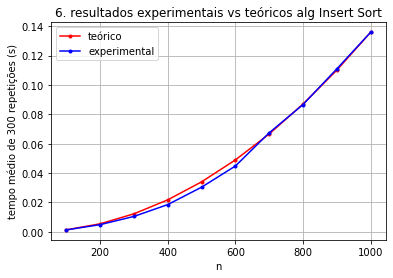

In [6]:
# GERANDO OS TEMPOS MEDIDOS PARA EXPORTAR AO NOTEBOOK DO BUBBLE SORT 
T

[0.00019941329956054687,
 0.00019927024841308593,
 0.0002624352773030599,
 0.00047065019607543944,
 0.0004193115234375,
 0.00047833919525146483,
 0.000535719735281808,
 0.0006852030754089355,
 0.0008633666568332248,
 0.001020641326904297,
 0.0012303482402454722]